<a href="https://colab.research.google.com/github/akshatgattani4/AI-ML/blob/main/Asg3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
data = pd.read_csv("Titanic-Dataset.csv")

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [24]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [81]:
data.Age.fillna(data.Age.median(), inplace = True)

In [21]:
data.Cabin.fillna(data.Cabin.mode()[0], inplace = True)

In [23]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)

In [82]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [83]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


<ipython-input-84-4cf58e2689cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

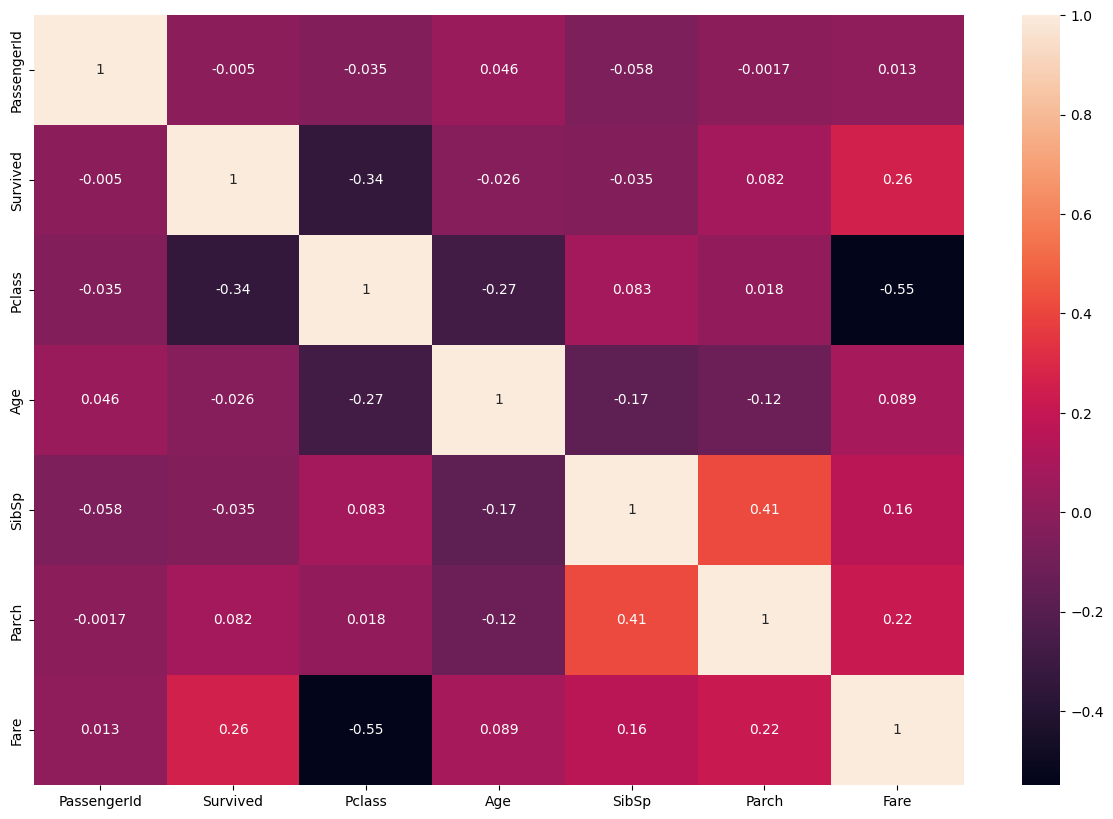

In [84]:
plt.subplots(figsize = (15,10))
sns.heatmap(data.corr(), annot = True)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

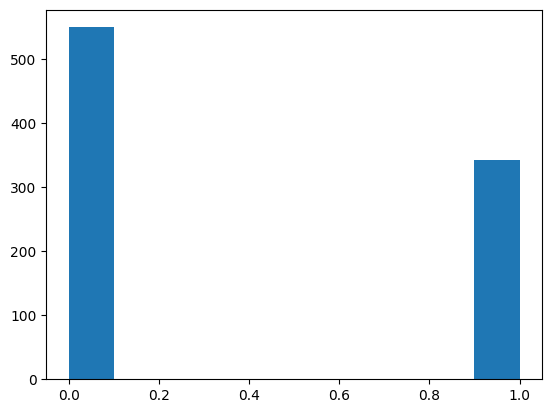

In [41]:
plt.hist(data.Survived, range = [0, 1])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

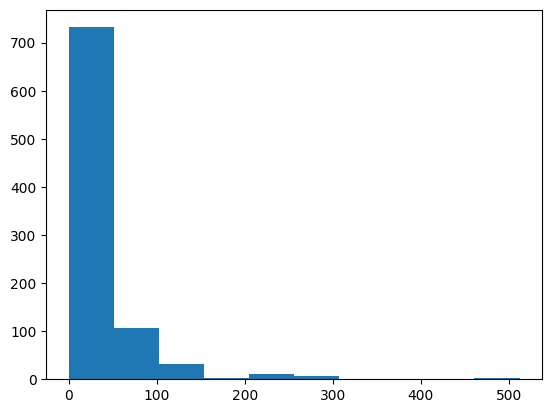

In [42]:
plt.hist(data.Fare)

(array([ 30.,  17.,  68., 107., 116., 344.,  74.,  53.,  44.,  38.]),
 array([ 3. ,  8.1, 13.2, 18.3, 23.4, 28.5, 33.6, 38.7, 43.8, 48.9, 54. ]),
 <BarContainer object of 10 artists>)

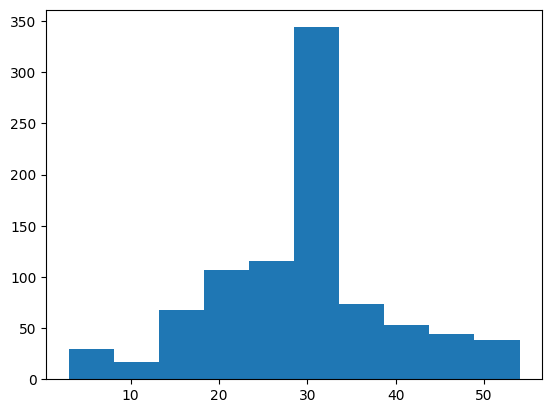

In [85]:
plt.hist(data.Age)

<Axes: ylabel='Survived'>

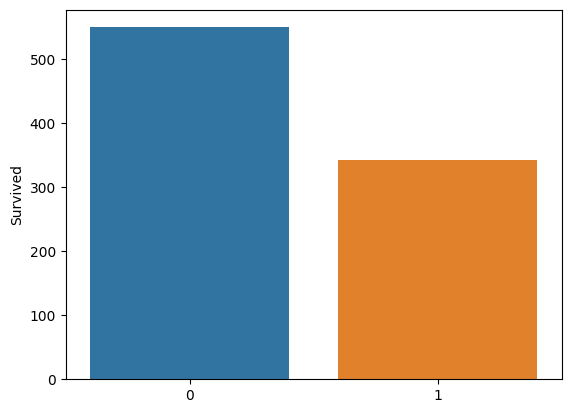

In [51]:
sns.barplot(x = data["Survived"].value_counts().index, y = data["Survived"].value_counts())

<Axes: ylabel='Pclass'>

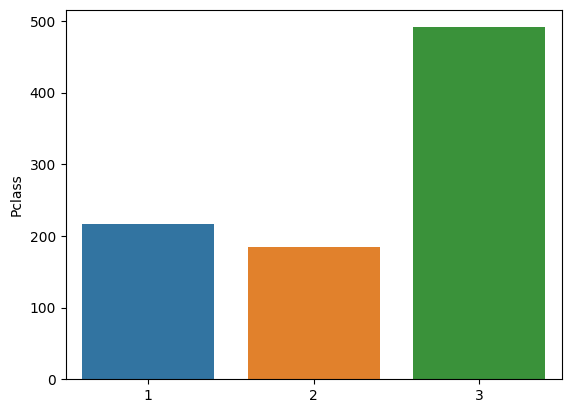

In [52]:
sns.barplot(x = data["Pclass"].value_counts().index, y = data["Pclass"].value_counts())

<Axes: >

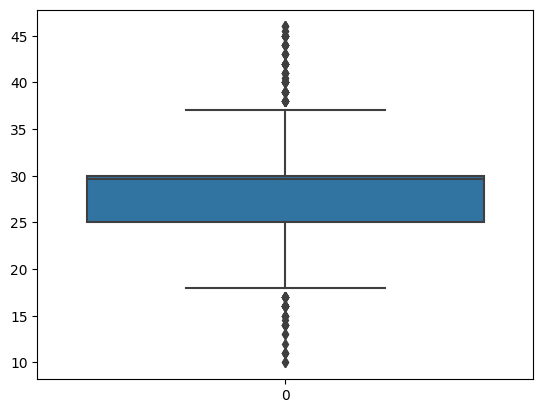

In [102]:
sns.boxplot(data.Age)

In [104]:
q1 = data.Age.quantile(0.25)
q3 = data.Age.quantile(0.75)

In [105]:
print(q1)
print(q3)

25.0
30.0


In [106]:
IQR = q3 - q1
IQR

5.0

In [107]:
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [108]:
print(upper_limit)
print(lower_limit)

37.5
17.5


In [110]:
data = data[data["Age"] < upper_limit]

In [111]:
data = data[data["Age"] > lower_limit]

<Axes: >

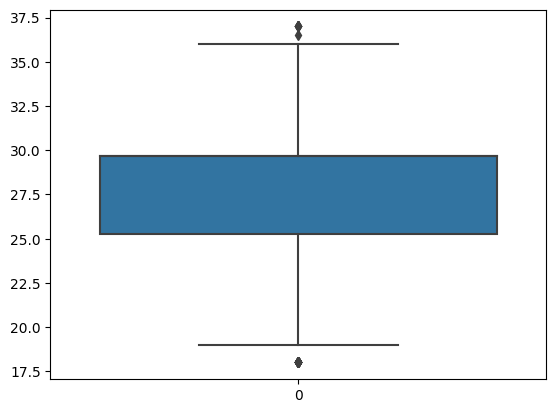

In [112]:
sns.boxplot(data.Age)

In [148]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96 B98,Q


In [134]:
y = data.Survived

In [139]:
x = data.iloc[:, np.r_[2:3, 4:8, 9:12]]

In [144]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [147]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,B96 B98,S
2,3,0,26.000000,0,0,7.9250,B96 B98,S
3,1,0,35.000000,1,0,53.1000,C123,S
4,3,1,35.000000,0,0,8.0500,B96 B98,S
5,3,1,29.699118,0,0,8.4583,B96 B98,Q


In [117]:
y.head()

0    0
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64

In [141]:
x.Sex.value_counts()

male      496
female    254
Name: Sex, dtype: int64

In [142]:
le = LabelEncoder()

In [149]:
x.Sex

0      1
2      0
3      0
4      1
5      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 750, dtype: int64

In [150]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,B96 B98,S
2,3,0,26.000000,0,0,7.9250,B96 B98,S
3,1,0,35.000000,1,0,53.1000,C123,S
4,3,1,35.000000,0,0,8.0500,B96 B98,S
5,3,1,29.699118,0,0,8.4583,B96 B98,Q


In [151]:
x.Cabin.value_counts()

B96 B98        585
C23 C25 C27      4
G6               4
E101             3
D                3
              ... 
C7               1
C54              1
E36              1
C106             1
C148             1
Name: Cabin, Length: 126, dtype: int64

In [152]:
x.Embarked.value_counts()

S    542
C    138
Q     70
Name: Embarked, dtype: int64

In [155]:
emb = pd.get_dummies(x.Embarked, drop_first = True)

In [156]:
emb

,Q,S
0,0,1
2,0,1
3,0,1
4,0,1
5,1,0
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [157]:
x = pd.concat([x, emb], axis = 1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Q,S
0,3,1,22.000000,1,0,7.2500,B96 B98,S,0,1
2,3,0,26.000000,0,0,7.9250,B96 B98,S,0,1
3,1,0,35.000000,1,0,53.1000,C123,S,0,1
4,3,1,35.000000,0,0,8.0500,B96 B98,S,0,1
5,3,1,29.699118,0,0,8.4583,B96 B98,Q,1,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,B96 B98,S,0,1
887,1,0,19.000000,0,0,30.0000,B42,S,0,1
888,3,0,29.699118,1,2,23.4500,B96 B98,S,0,1
889,1,1,26.000000,0,0,30.0000,C148,C,0,0


In [158]:
x.drop(["Embarked"], axis=1, inplace = True)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S
0,3,1,22.000000,1,0,7.2500,B96 B98,0,1
2,3,0,26.000000,0,0,7.9250,B96 B98,0,1
3,1,0,35.000000,1,0,53.1000,C123,0,1
4,3,1,35.000000,0,0,8.0500,B96 B98,0,1
5,3,1,29.699118,0,0,8.4583,B96 B98,1,0
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,B96 B98,0,1
887,1,0,19.000000,0,0,30.0000,B42,0,1
888,3,0,29.699118,1,2,23.4500,B96 B98,0,1
889,1,1,26.000000,0,0,30.0000,C148,0,0


In [159]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [163]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S
297,1,0,29.69,1,2,151.5500,C22 C26,0,1
118,1,1,24.00,0,1,247.5208,B58 B60,0,0
614,3,1,35.00,0,0,8.0500,B96 B98,0,1
190,2,0,32.00,0,0,13.0000,B96 B98,0,1
605,3,1,36.00,1,0,15.5500,B96 B98,0,1


In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
lr = LinearRegression()